In [ ]:
!pip install geopandas
!pip install contextily
import geopandas 
import contextily as ctx

     |████████████████████████████████| 1.0 MB 8.0 MB/s 
     |████████████████████████████████| 15.4 MB 53.7 MB/s 
     |████████████████████████████████| 6.3 MB 34.2 MB/s 
     |████████████████████████████████| 19.3 MB 35.1 MB/s 


1. visualizzi su una mappa i 10 corsi d'acqua più lunghi della provincia di Milano

In [ ]:
bike_ciclabili = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/bike_ciclabili/bike_ciclabili.dbf')
quartieri = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm (1)/NIL_WM.dbf')
fontanelle = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Fontanelle/Fontanelle_OSM_ODbL.dbf")
corsi_acqua = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Corsi_acqua_Piano_di_Gestione/Corsi_acqua_Piano_di_Gestione.dbf")
comuni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Com01012021_g")
province = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/ProvCM01012021_g")
regioni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Reg01012021_g")

In [ ]:
milano = province[province.DEN_UTS=='Milano']
milano

COD_RIP  ...                                           geometry
14        1  ...  MULTIPOLYGON (((538136.289 5004372.814, 539162...

[1 rows x 13 columns]

In [ ]:
corsiacqua_milano = corsi_acqua[corsi_acqua.intersects(milano.unary_union)]
corsiacqua_milano.sort_values('SHAPE_LEN',ascending=False).head(10)

OBJECTID  ...                                           geometry
18       124  ...  MULTILINESTRING ((478097.612 5045956.958, 4780...
36       593  ...  MULTILINESTRING ((541297.507 5041518.075, 5412...
10        84  ...  MULTILINESTRING ((541297.507 5041518.075, 5412...
0        188  ...  LINESTRING (480362.262 5040575.220, 480364.627...
7         65  ...  MULTILINESTRING ((483579.882 5034726.498, 4835...
31       501  ...  LINESTRING (541227.887 5050214.931, 541227.203...
26       357  ...  MULTILINESTRING ((495438.399 5047188.843, 4954...
8         66  ...  MULTILINESTRING ((477067.969 5044605.066, 4770...
15       112  ...  MULTILINESTRING ((516227.432 5021570.890, 5162...
1        191  ...  MULTILINESTRING ((494060.091 5029696.046, 4940...

[10 rows x 31 columns]

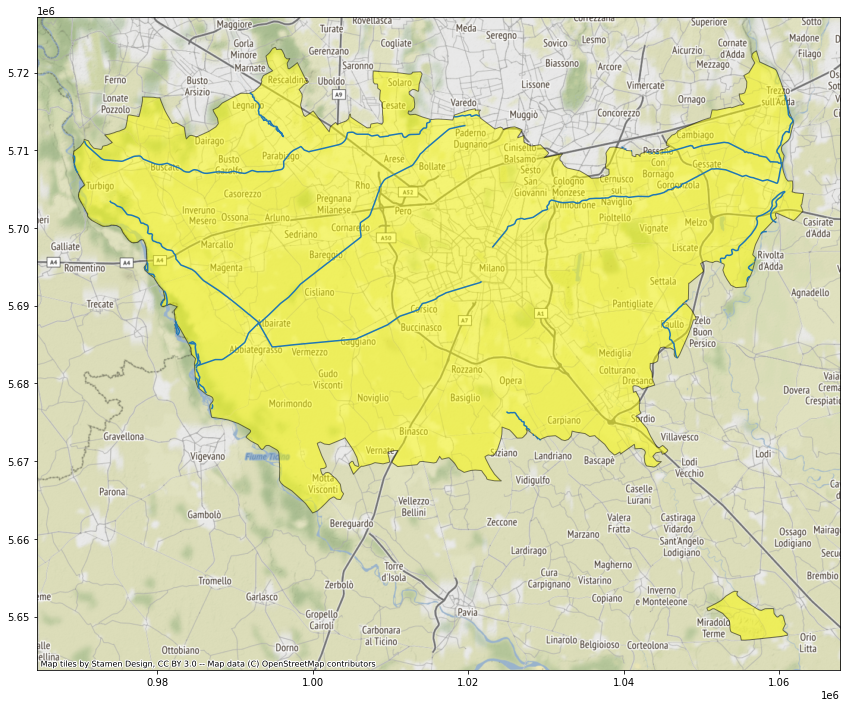

In [ ]:
ax = corsiacqua_milano.sort_values('SHAPE_LEN',ascending=False).head(10).to_crs(epsg=3857).plot(figsize=(20,12))
milano.to_crs(epsg=3857).plot(ax=ax, facecolor='yellow', alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

2. visualizzi su una mappa i Navigli e i fiumi da cui prendono l'acqua. Utilizzare colori diversi per rappresentare i navigli rispetto ai fiumi ed evidenziare bene i percorsi sulla mappa

In [ ]:
corsi_acquanavigli = corsi_acqua[corsi_acqua.NOME.str.contains('Navigli')]
corsi_acquanavigli

OBJECTID  ...                                           geometry
0        188  ...  LINESTRING (480362.262 5040575.220, 480364.627...
31       501  ...  LINESTRING (541227.887 5050214.931, 541227.203...
32       398  ...  LINESTRING (513927.378 5033222.100, 513927.258...
44       676  ...  LINESTRING (507915.612 5019743.337, 507917.175...

[4 rows x 31 columns]

In [ ]:
fiuminavigli = corsi_acqua[corsi_acqua.touches(corsi_acquanavigli.unary_union)]
fiuminavigli

OBJECTID  ...                                           geometry
6        282  ...  LINESTRING (514894.561 5036362.164, 514898.993...
20       170  ...  LINESTRING (534665.365 5048814.505, 534665.277...
22       323  ...  MULTILINESTRING ((540405.663 5051150.915, 5404...
28       448  ...  LINESTRING (512157.688 5048463.394, 512157.976...
39       619  ...  LINESTRING (513185.093 5030112.328, 513188.599...

[5 rows x 31 columns]

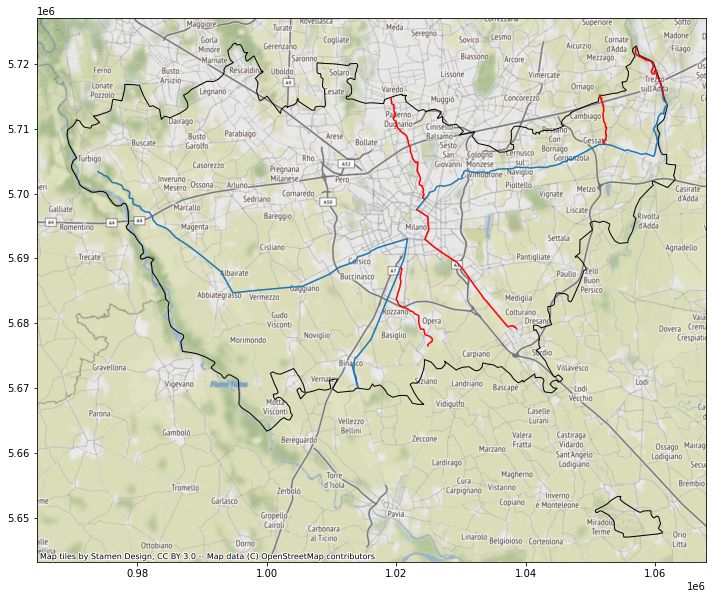

In [ ]:
ax = milano.to_crs(epsg=3857).plot(figsize=(20,10), facecolor='none', edgecolor='k')
corsi_acquanavigli.to_crs(epsg=3857).plot(ax=ax)
fiuminavigli.to_crs(epsg=3857).plot(ax=ax, edgecolor='r')
ctx.add_basemap(ax)

3. visualizzi su una mappa i corsi d'acqua che passano in un comune inserito dall'utente

Inserire un comune: Bresso


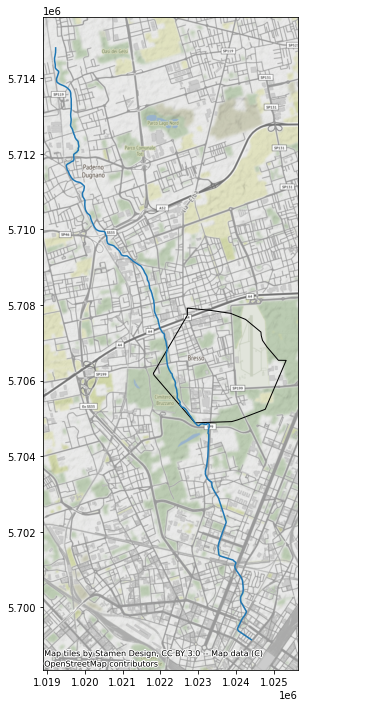

In [ ]:
user = input('Inserire un comune: ')
lst = list(comuni['COMUNE'])
if user not in lst:
  print('Comune non in Lombardia')
else:
  comu = comuni[comuni.COMUNE==user]
  corsicomuni = corsi_acqua[corsi_acqua.intersects(comu.geometry.squeeze())]
  ax = corsicomuni.to_crs(epsg=3857).plot(figsize=(20,12))
  comu.to_crs(epsg=3857).plot(ax=ax, facecolor='none', edgecolor='k')
  ctx.add_basemap(ax)

4. visualizzi su una mappa un fiume inserito dall'utente con tutti i comuni  che attraversa. Se attraversa Milano, visualizzare solo i quartieri che attraversa

Inserire un fiume: Seveso (Torrente)


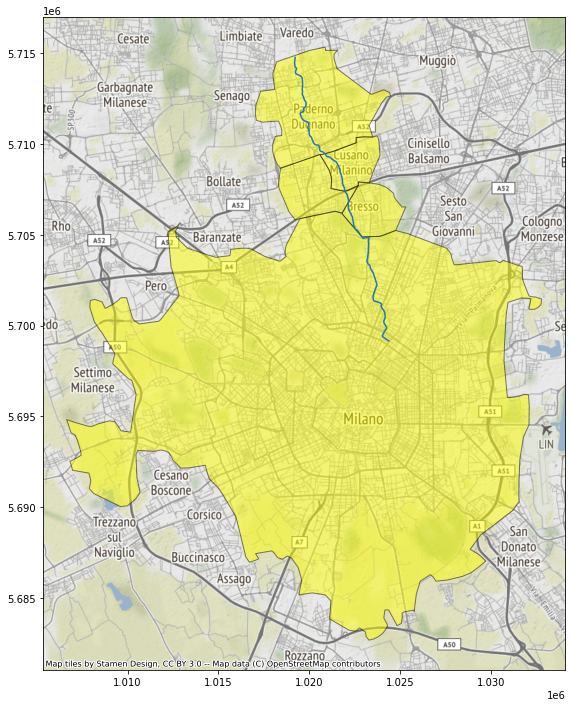

In [ ]:
user = input('Inserire un fiume: ')
lst = list(corsi_acqua['NOME'])
if user not in lst:
  print('Fiume inesistente')
else:
  fiume = corsi_acqua[corsi_acqua.NOME == user]
  comunifiume = comuni[comuni.intersects(fiume.geometry.squeeze())]
  ax = comunifiume.to_crs(epsg=3857).plot(figsize=(20,12), facecolor='yellow',alpha=0.5, edgecolor='k')
  fiume.to_crs(epsg=3857).plot(ax=ax)
  ctx.add_basemap(ax)

5. visualizzi il numero di corsi d'acqua della provincia di Milano e la lunghezza totale di tutti i corsi d'acqua

In [ ]:
corsiacqua_milano = corsi_acqua[corsi_acqua.intersects(milano.unary_union)]
corsiacqua_milano.count().NOME

45

In [ ]:
corsiacqua_milano.sum().SHAPE_LEN

1083787.6793008223

6. visualizzi su una mappa i comuni della provincia di Milano che non sono attraversati da corsi d'acqua


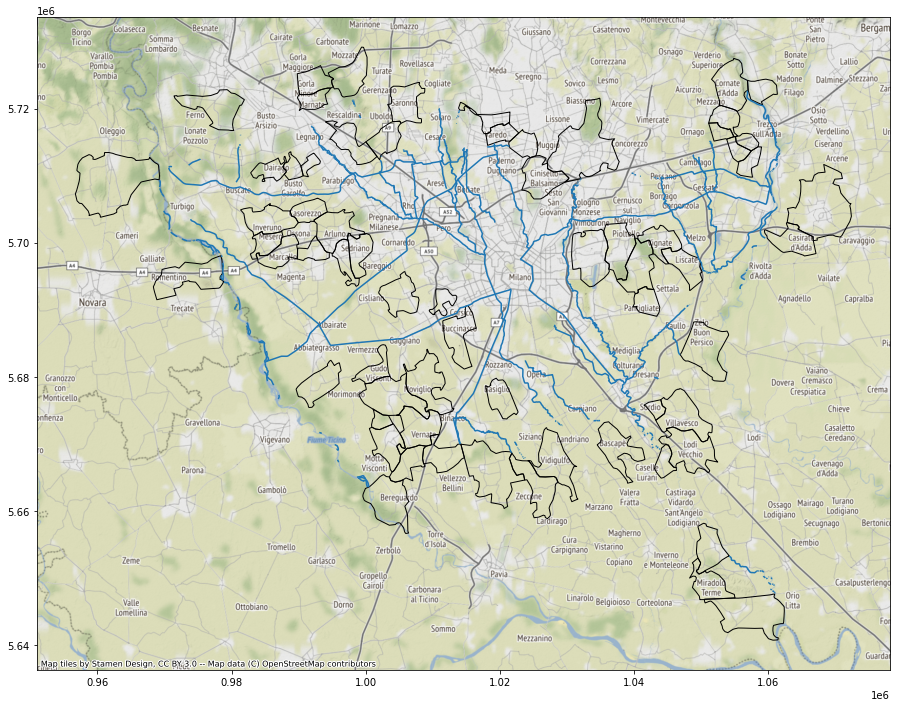

In [ ]:
comunimilano = comuni[comuni.intersects(milano.unary_union)]
com = comunimilano[comunimilano.intersects(corsi_acqua.unary_union)]
comu = comunimilano[comunimilano.touches(com.unary_union)]
ax = comu.to_crs(epsg=3857).plot(facecolor='none', edgecolor='k',figsize=(20,12))
corsiacqua_milano.to_crs(epsg=3857).plot(ax=ax)
ctx.add_basemap(ax)